In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# LogisticRegression Model


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
exp_data = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_03.csv')

In [6]:
exp_data.head()

,ID,Name,Joining Date,Age,Birth Date,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,30.952374,Intermediate,SPI Errors,0.474453
1,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.083474,Intermediate,SPI Errors,0.753039
2,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,37.246623,Intermediate,High Low,0.173610
3,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.716454,Intermediate,High Low,0.865333
4,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,32.490001,Intermediate,High Low,0.846176


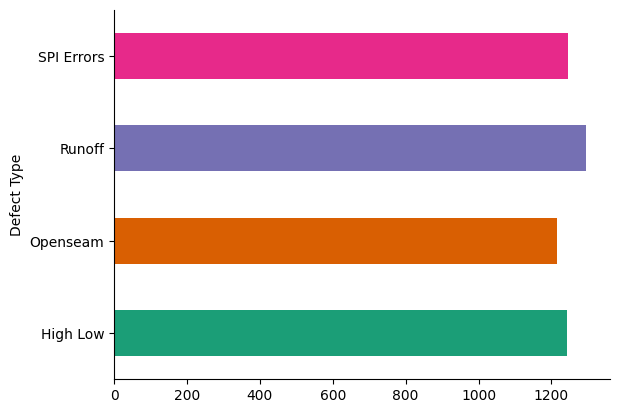

In [7]:
# title Defect Type

from matplotlib import pyplot as plt
import seaborn as sns
exp_data.groupby('Defect Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
exp_data2.head()

,ID,Name,Joining Date,Age,Birth Date,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,25.788073,Beginner,SPI Errors,48.9066
1,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,22.189826,Beginner,SPI Errors,15.1966
2,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,24.385796,Beginner,Runoff,28.4736
3,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,29.253169,Beginner,Runoff,9.8801
4,27466,Dale Gilbert,2021-04-26,21,2003-04-23,Female,Diploma,20.239241,Beginner,SPI Errors,47.2479


In [9]:
merged_data = pd.concat([exp_data, exp_data2], ignore_index=True)

In [10]:
merged_data.head()

,ID,Name,Joining Date,Age,Birth Date,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,30.952374,Intermediate,SPI Errors,0.474453
1,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.083474,Intermediate,SPI Errors,0.753039
2,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,37.246623,Intermediate,High Low,0.173610
3,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.716454,Intermediate,High Low,0.865333
4,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,32.490001,Intermediate,High Low,0.846176


In [11]:
merged_data.count()

ID                       10000
Name                     10000
Joining Date             10000
Age                      10000
Birth Date               10000
Gender                   10000
Education                10000
Average Working Hours    10000
Skill Level              10000
Defect Type              10000
Defect Rate              10000
dtype: int64

In [12]:
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Joining Date']

# Drop the specified fields
# merged_data.drop(columns=fields_to_drop, inplace=True)
merged_data = exp_data.drop(columns=fields_to_drop, inplace=True)

In [13]:
exp_data.head()

,Age,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,25,Female,Diploma,30.952374,Intermediate,SPI Errors,0.474453
1,25,Female,Diploma,31.083474,Intermediate,SPI Errors,0.753039
2,25,Female,Diploma,37.246623,Intermediate,High Low,0.173610
3,25,Female,Diploma,31.716454,Intermediate,High Low,0.865333
4,25,Female,Diploma,32.490001,Intermediate,High Low,0.846176


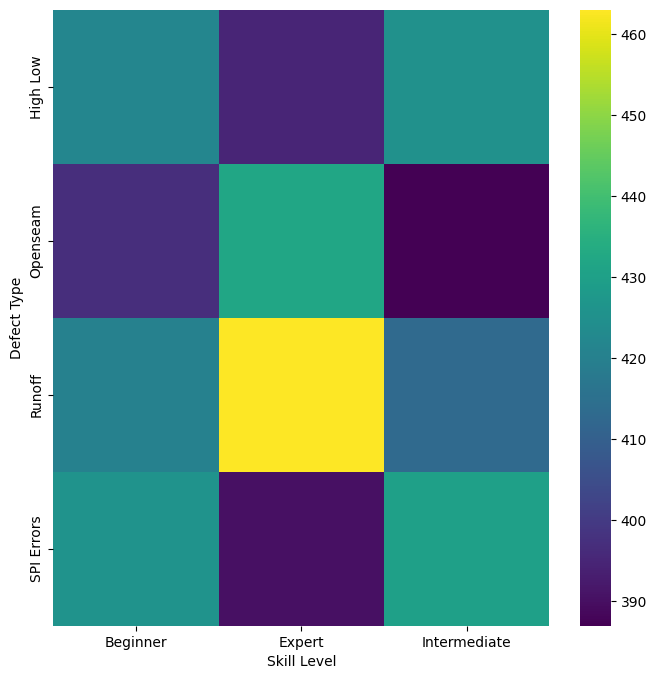

In [14]:
# @title Skill Level vs Defect Type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Defect Type'].value_counts()
    for x_label, grp in exp_data.groupby('Skill Level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Skill Level')
_ = plt.ylabel('Defect Type')

In [15]:
# # @title Defect rate vs Average working hours

# import matplotlib.pyplot as plt
# plt.scatter(merged_data['Average Working Hours'], merged_data['Defect Rate'])
# plt.xlabel('Average Working Hours')
# plt.ylabel('Defect Rate')
# _ = plt.title('Defect rate vs Average working hours')

In [16]:
exp_data.shape

(5000, 7)

In [17]:
Y = exp_data['Defect Rate']
X = exp_data.drop("Defect Rate", axis = 1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Gender", "Education", "Skill Level", "Defect Type"]
one_hot = OneHotEncoder()
transformed = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformed.fit_transform(X)
transformed_x

array([[ 1.        ,  0.        ,  1.        , ...,  1.        ,
        25.        , 30.95237441],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
        25.        , 31.08347405],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
        25.        , 37.24662266],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        21.        , 27.53756441],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        21.        , 26.17663904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        21.        , 25.4025521 ]])

In [19]:
transformed_x.shape

(5000, 13)

In [20]:
# transformed_x.head()

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Model
model = RandomForestRegressor()
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_x, Y, test_size=0.2)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

-0.13428804238652003

# Predictions for new data points using a trained model example

In [22]:
input_data = (16, 1, 4, 30, 2, 0, 0, 2, 0, 0, 0, 0, 0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0.63827319]


# Try Difference Models



# *   RandomForest
# *  GradientBoosting

# *   LinearRegression






In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
# Read the data
exp_data = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_03.csv')

In [25]:
# Combine the data
merged_data = pd.concat([exp_data, exp_data2], ignore_index=True)

In [26]:
# Drop unnecessary columns
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Joining Date']
merged_data.drop(columns=fields_to_drop, inplace=True)

In [27]:
# Separate features and target variable
X = merged_data.drop("Defect Rate", axis=1)
y = merged_data['Defect Rate']

In [28]:
# Define categorical features for one-hot encoding
categorical_features = ["Gender", "Education", "Skill Level", "Defect Type"]

In [29]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

In [30]:
# Define models
models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('LinearRegression', LinearRegression())
]

In [31]:
# Define pipeline for each model
pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipelines.append((name, pipeline))

In [32]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train and evaluate models
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R^2 Score': score, 'MSE': mse}


In [34]:
# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"R^2 Score: {metrics['R^2 Score']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print()

Model: RandomForest
R^2 Score: -0.1539
MSE: 293.8220

Model: GradientBoosting
R^2 Score: 0.0005
MSE: 254.5120

Model: LinearRegression
R^2 Score: -0.0007
MSE: 254.8130



# above 3 models visulaization

Model: RandomForest
Feature Importance:
Age: 0.0
Gender: 0.020680232250611327
Education: 0.020152005140261407
Average Working Hours: 0.021193007897751706
Skill Level: 0.0020601793246774547
Defect Type: 0.0016561379000738466

Model: GradientBoosting
Feature Importance:
Age: 0.0
Gender: 0.048523522570953236
Education: 0.02487508378168857
Average Working Hours: 0.03739864769402586
Skill Level: 0.0
Defect Type: 0.0

Model: LinearRegression
Model Coefficients:
Age: 0.0
Gender: -20676046193354.492
Education: -20676046193355.09
Average Working Hours: -20676046193355.09
Skill Level: -70654439030.09814
Defect Type: -70654439030.16357



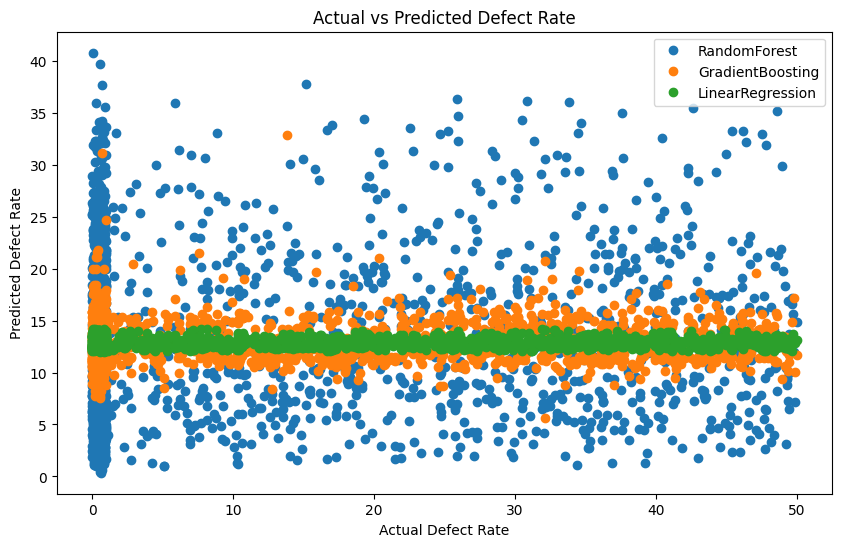

In [35]:
import matplotlib.pyplot as plt

# Print model summaries
for name, pipeline in pipelines:
    print(f"Model: {name}")
    if name == 'LinearRegression':
        print("Model Coefficients:")
        coefficients = pipeline.named_steps['model'].coef_
        for i, feature in enumerate(X.columns):
            print(f"{feature}: {coefficients[i]}")
    elif name in ['RandomForest', 'GradientBoosting']:
        feature_importances = pipeline.named_steps['model'].feature_importances_
        print("Feature Importance:")
        for i, feature in enumerate(X.columns):
            print(f"{feature}: {feature_importances[i]}")
    print()

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
for name, pipeline in pipelines:
    y_pred = pipeline.predict(X_test)
    plt.plot(y_test, y_pred, 'o', label=name)
plt.xlabel('Actual Defect Rate')
plt.ylabel('Predicted Defect Rate')
plt.title('Actual vs Predicted Defect Rate')
plt.legend()
plt.show()


# Exploring the Impact of Gender and Education Level on Defect Rates in Manufacturing.

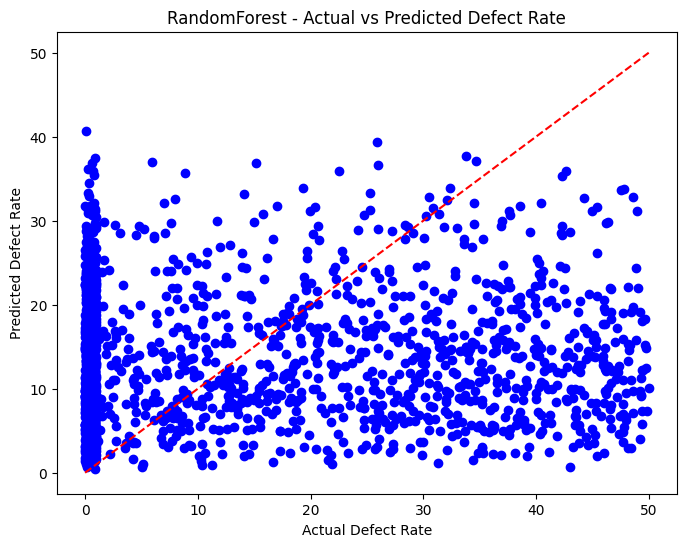

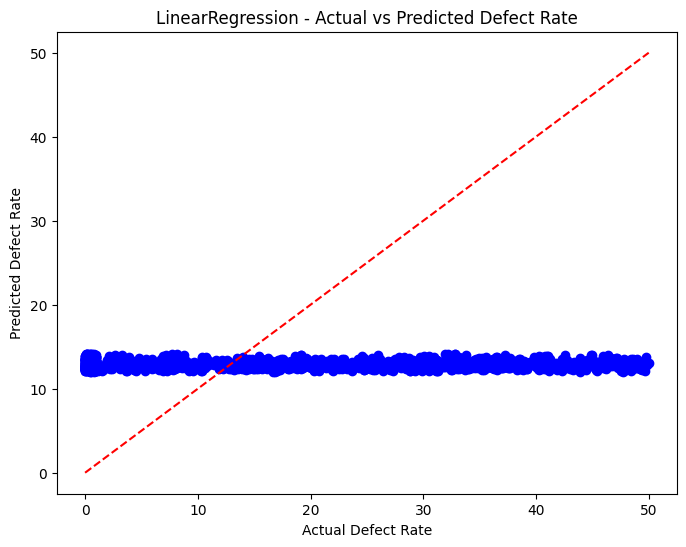

Model: RandomForest
R^2 Score: -0.1487
MSE: 292.4991

Model: LinearRegression
R^2 Score: -0.0007
MSE: 254.8130



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Read the data
exp_data = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_03.csv')

# Combine the data
merged_data = pd.concat([exp_data, exp_data2], ignore_index=True)

# Drop unnecessary columns
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Joining Date']
merged_data.drop(columns=fields_to_drop, inplace=True)

# Separate features and target variable
X = merged_data.drop("Defect Rate", axis=1)
y = merged_data['Defect Rate']

# Define categorical features for one-hot encoding
categorical_features = ["Gender", "Education", "Skill Level", "Defect Type"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Define models
models = [
    ('RandomForest', RandomForestRegressor()),
    ('LinearRegression', LinearRegression())
]

# Define pipeline for each model
pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipelines.append((name, pipeline))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R^2 Score': score, 'MSE': mse}

    # Plot actual vs predicted defect rates
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
    plt.xlabel('Actual Defect Rate')
    plt.ylabel('Predicted Defect Rate')
    plt.title(f'{name} - Actual vs Predicted Defect Rate')
    plt.show()

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"R^2 Score: {metrics['R^2 Score']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print()

# Exploring Demographic Factors Influencing Defect Rates in Manufacturing Processes

C:\Users\user\AppData\Local\Temp\ipykernel_10664\155439748.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=skills_data, ax=axes[1], palette='pastel')


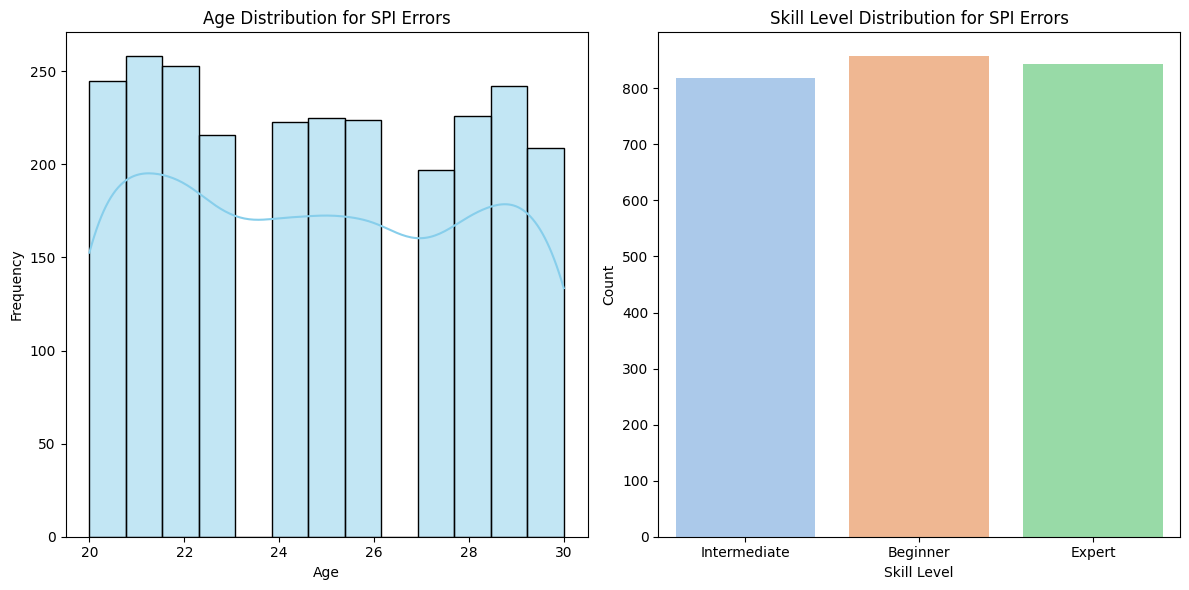

C:\Users\user\AppData\Local\Temp\ipykernel_10664\155439748.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=skills_data, ax=axes[1], palette='pastel')


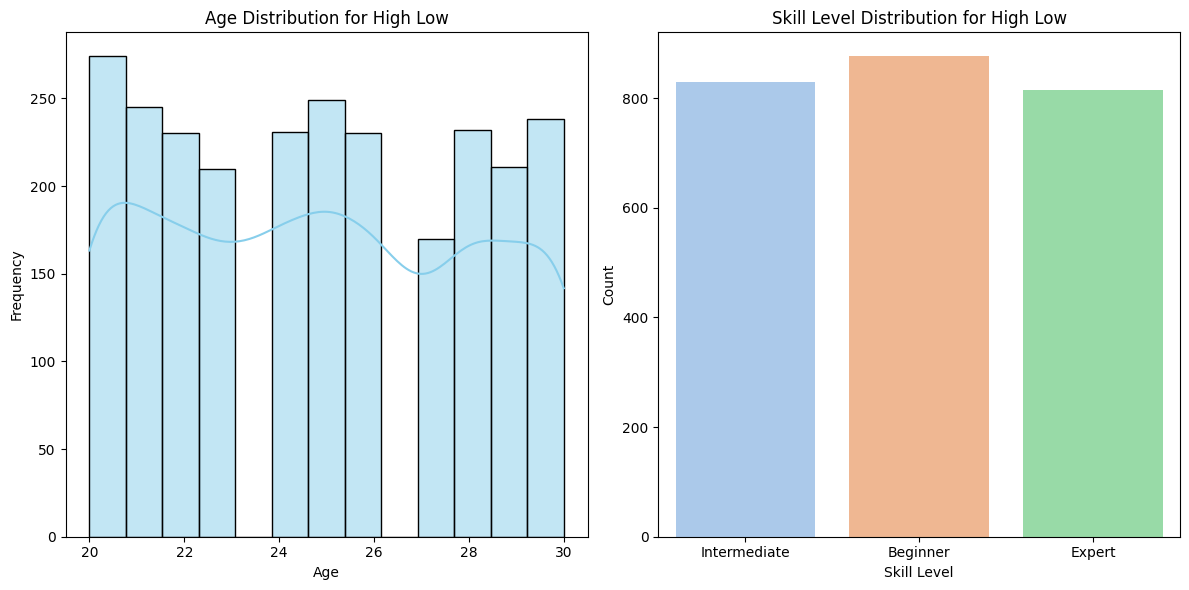

C:\Users\user\AppData\Local\Temp\ipykernel_10664\155439748.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=skills_data, ax=axes[1], palette='pastel')


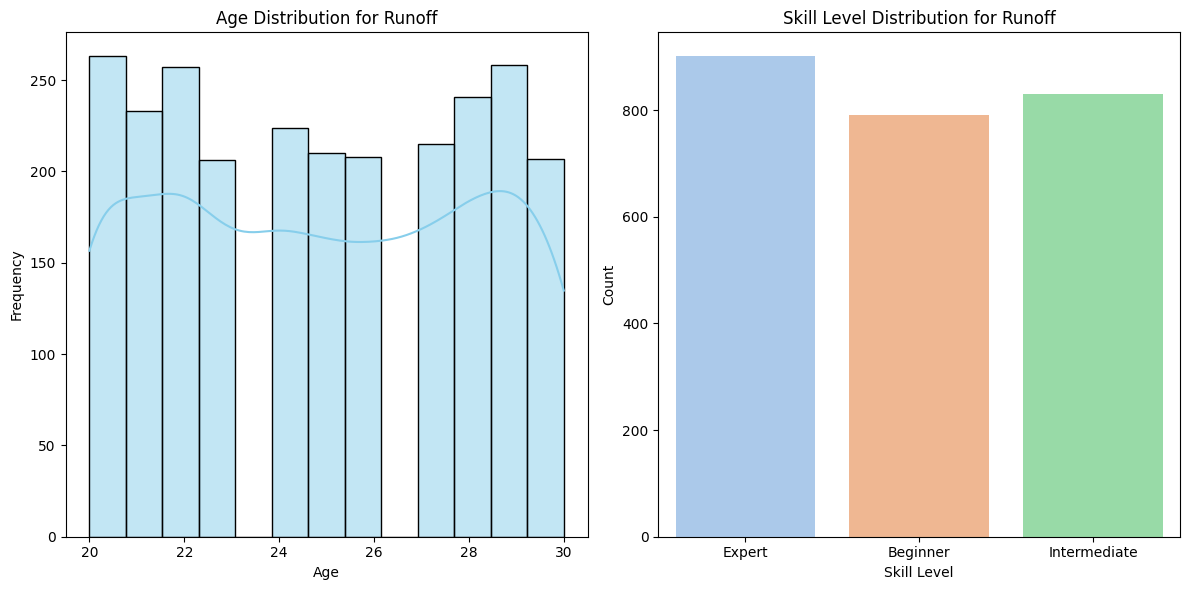

C:\Users\user\AppData\Local\Temp\ipykernel_10664\155439748.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=skills_data, ax=axes[1], palette='pastel')


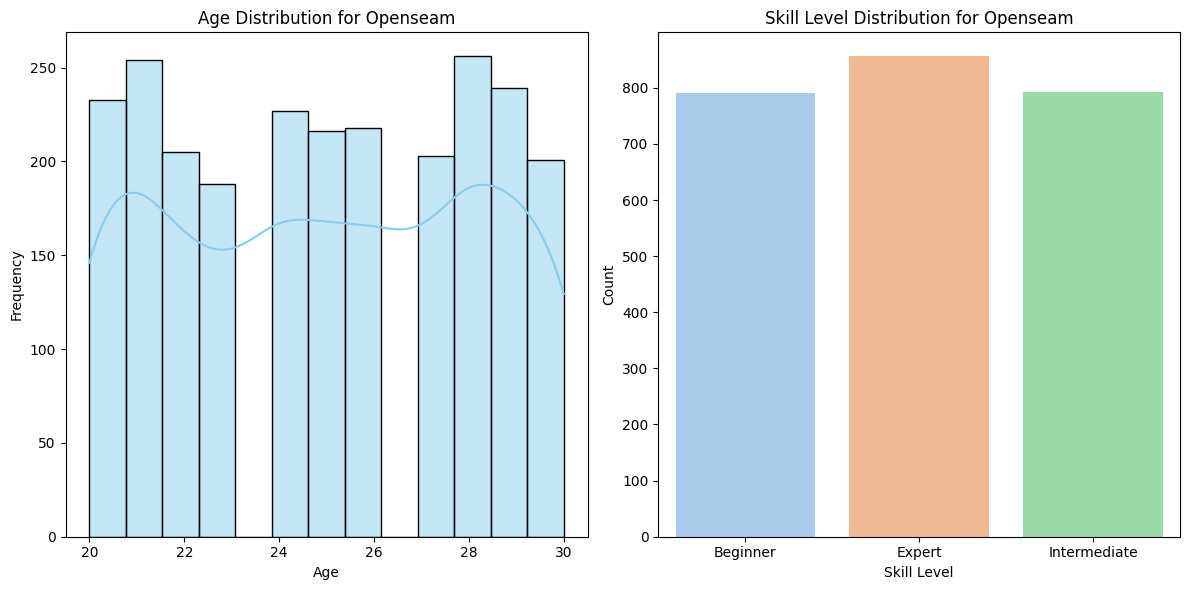

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Read the data
exp_data = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_03.csv')

# Combine the data
merged_data = pd.concat([exp_data, exp_data2], ignore_index=True)

# Drop unnecessary columns
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Joining Date']
merged_data.drop(columns=fields_to_drop, inplace=True)

# Define categorical features for one-hot encoding
categorical_features = ["Gender", "Education", "Skill Level", "Defect Type"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Separate features and target variable
X = merged_data.drop("Defect Rate", axis=1)
y = merged_data['Defect Rate']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to analyze the effect of age and skills on each defect type
def analyze_defect_type_effect(data, defect_type):
    # Filter data for the specified defect type
    defect_data = data[data['Defect Type'] == defect_type]

    # Extract age and skills data
    age_data = defect_data['Age']
    skills_data = defect_data['Skill Level']

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot age distribution
    sns.histplot(age_data, ax=axes[0], kde=True, color='skyblue')
    axes[0].set_title('Age Distribution for ' + defect_type)
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Frequency')

    # Plot skill level distribution
    sns.countplot(x=skills_data, ax=axes[1], palette='pastel')
    axes[1].set_title('Skill Level Distribution for ' + defect_type)
    axes[1].set_xlabel('Skill Level')
    axes[1].set_ylabel('Count')

    # Show plots
    plt.tight_layout()
    plt.show()

# Iterate over each defect type and analyze its effect on age and skills
defect_types = merged_data['Defect Type'].unique()
for defect_type in defect_types:
    analyze_defect_type_effect(merged_data, defect_type)


# Analyzing the Impact of Demographic Factors on Defect Rates Across Different Manufacturing Defect Types

Model: RandomForest, Defect Type: SPI Errors, MSE: 96.6256


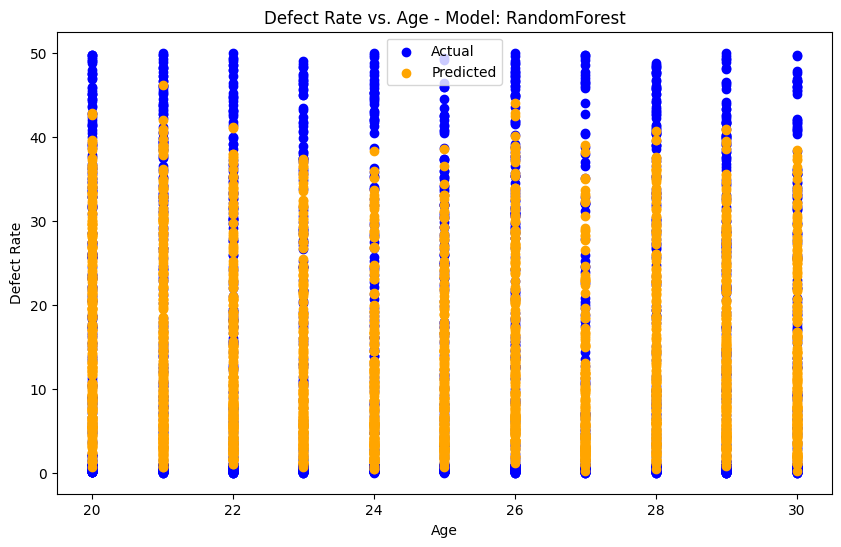

Model: GradientBoosting, Defect Type: SPI Errors, MSE: 259.2974


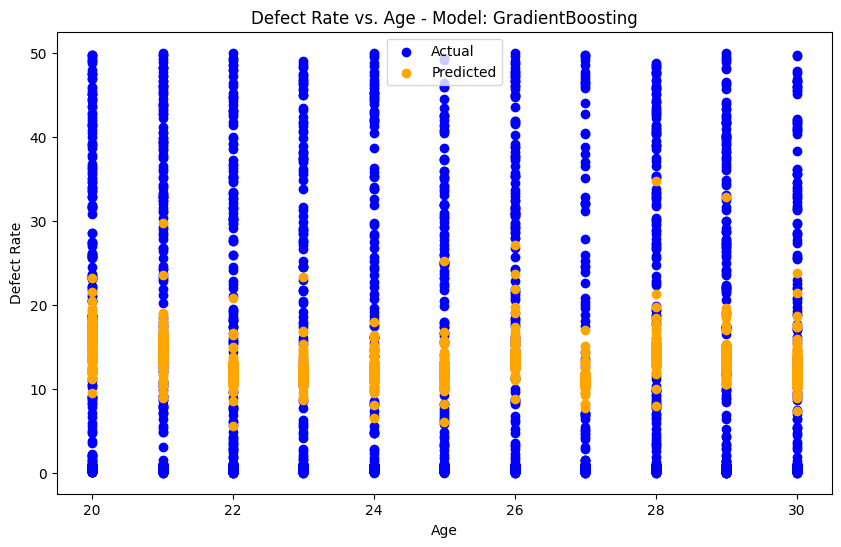

Model: LinearRegression, Defect Type: SPI Errors, MSE: 271.3404


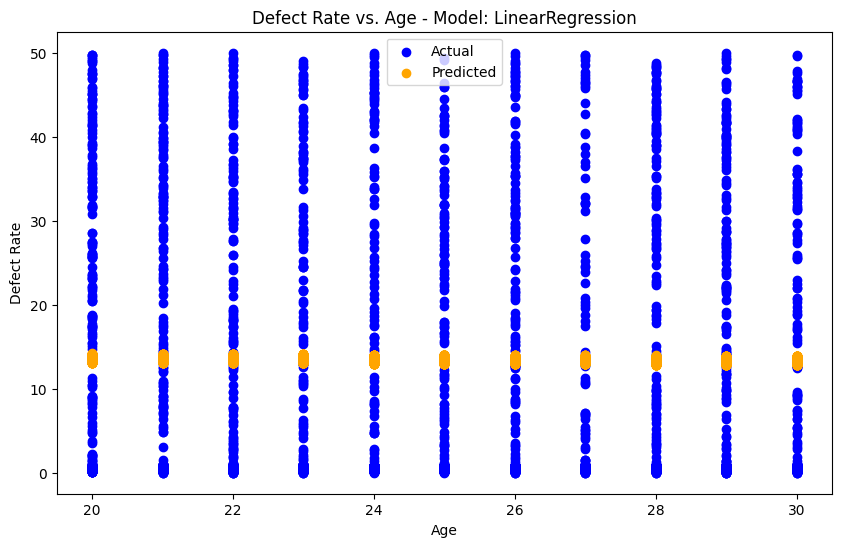

Model: RandomForest, Defect Type: High Low, MSE: 90.6326


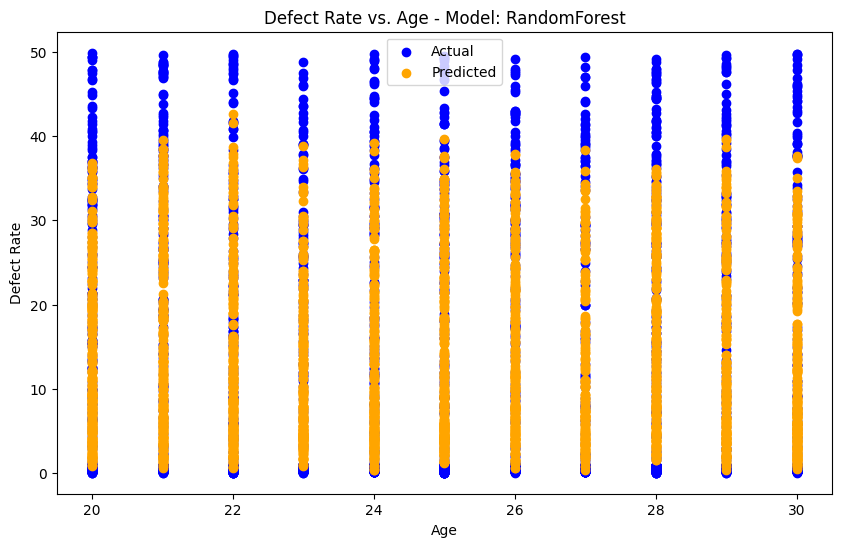

Model: GradientBoosting, Defect Type: High Low, MSE: 240.8071


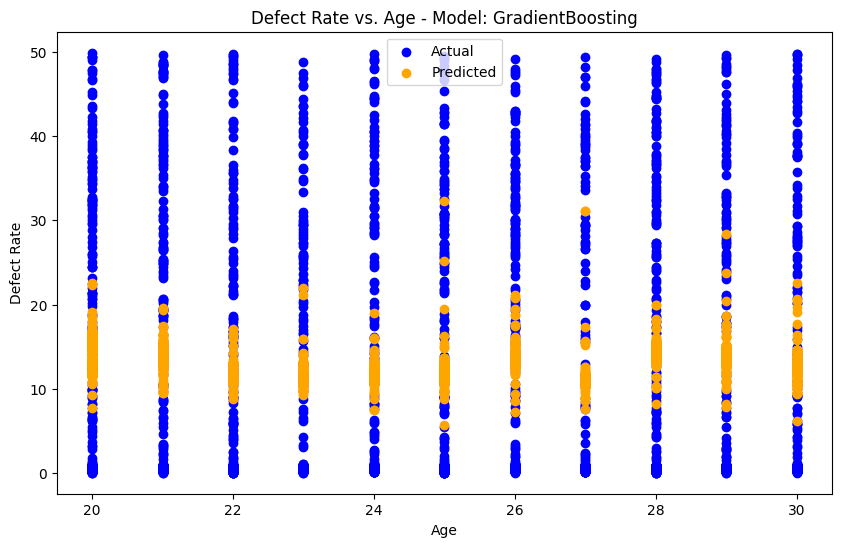

Model: LinearRegression, Defect Type: High Low, MSE: 251.3769


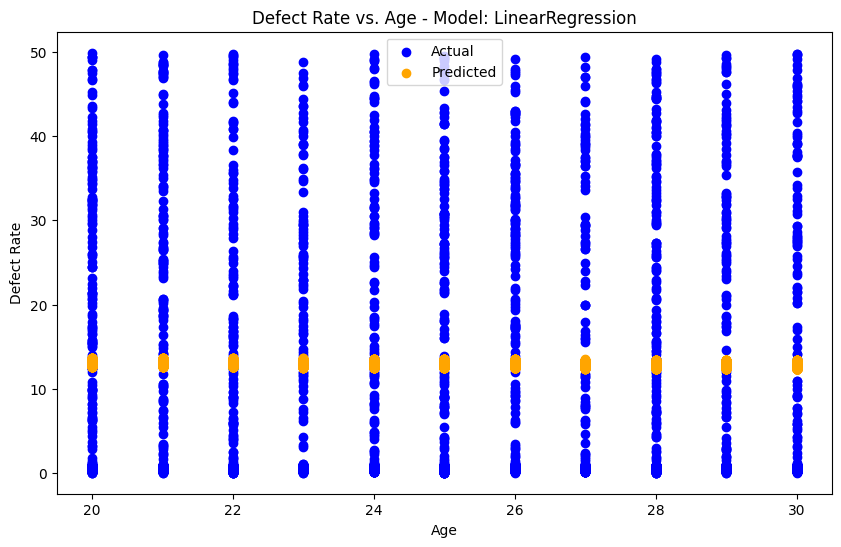

Model: RandomForest, Defect Type: Runoff, MSE: 86.9620


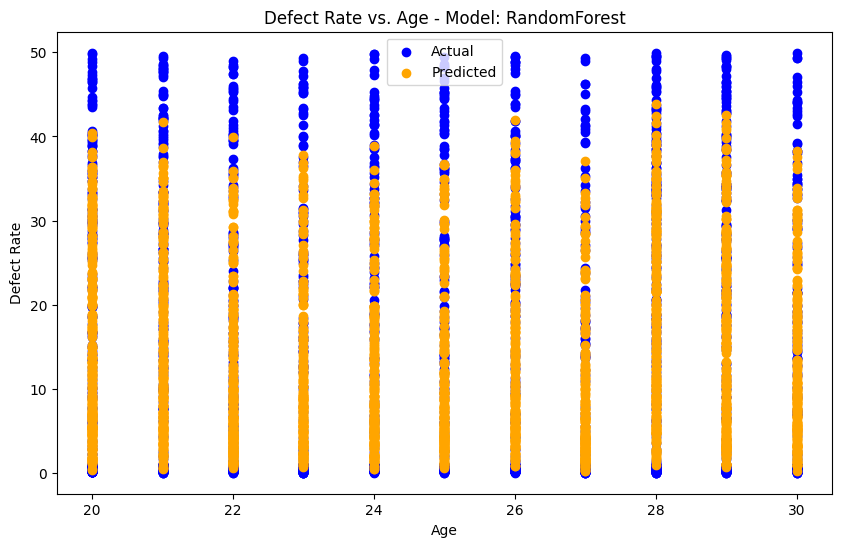

Model: GradientBoosting, Defect Type: Runoff, MSE: 238.4558


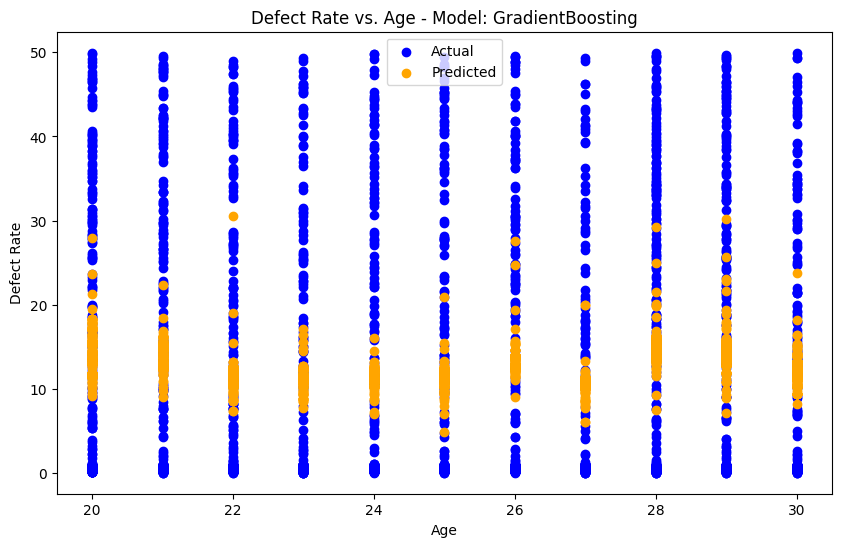

Model: LinearRegression, Defect Type: Runoff, MSE: 251.1974


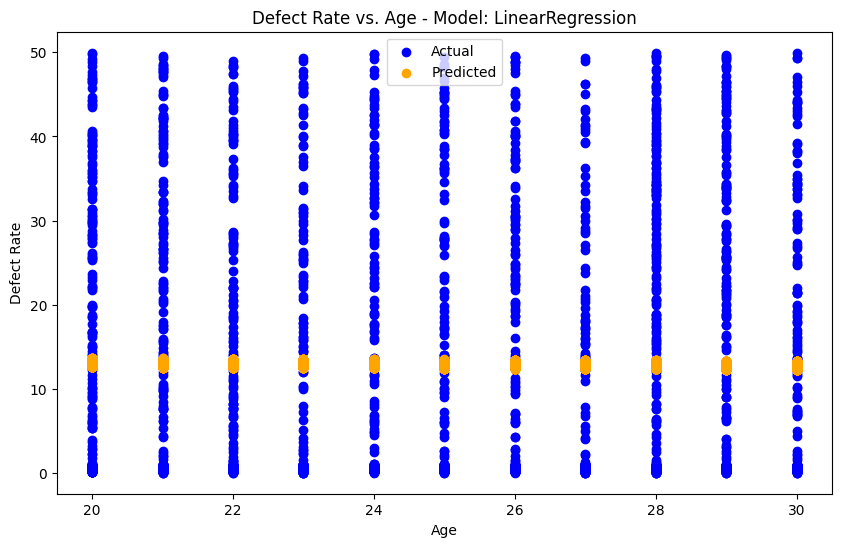

Model: RandomForest, Defect Type: Openseam, MSE: 94.2279


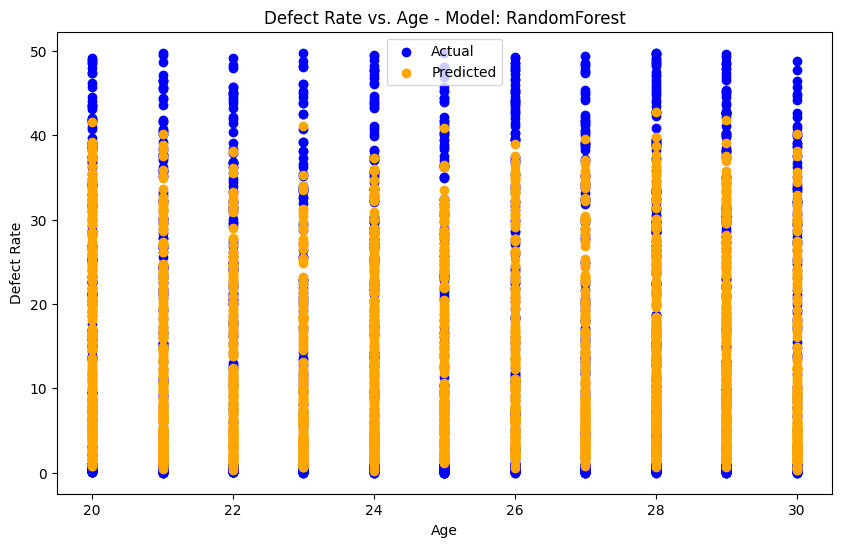

Model: GradientBoosting, Defect Type: Openseam, MSE: 248.3029


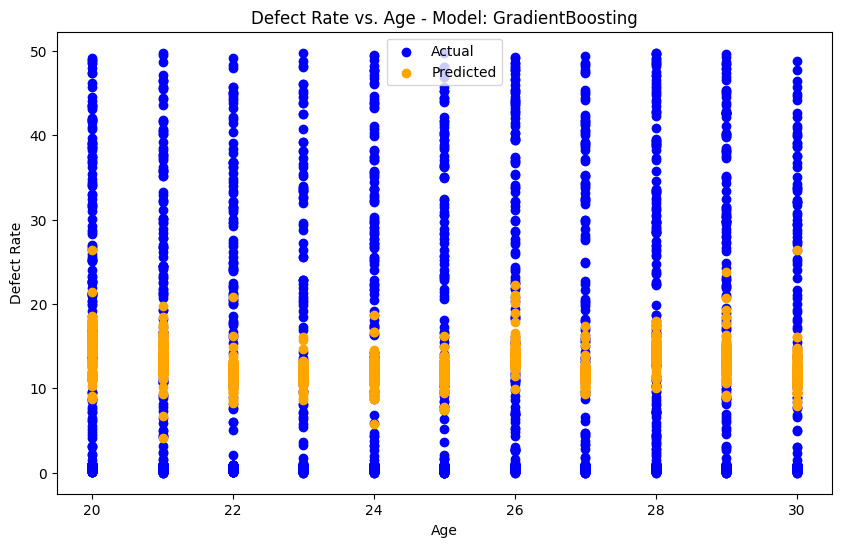

Model: LinearRegression, Defect Type: Openseam, MSE: 258.0037


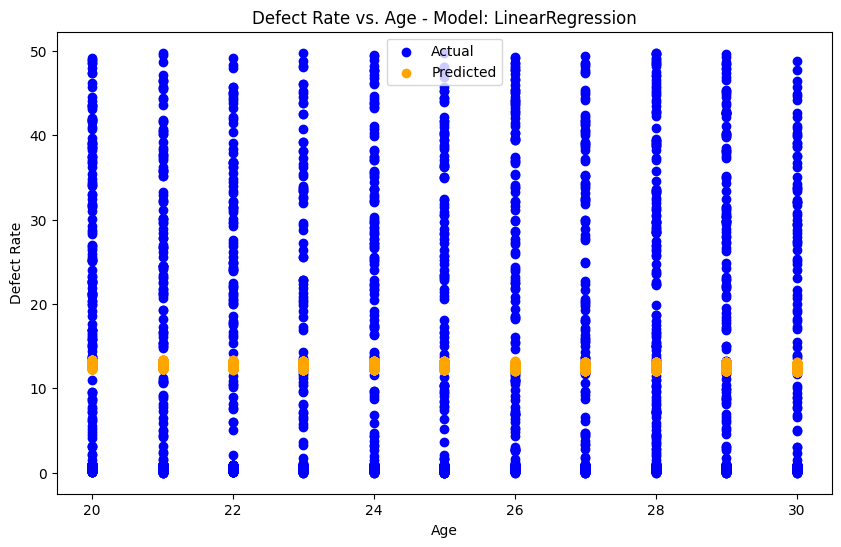

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Read the data
exp_data = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_03.csv')

# Combine the data
merged_data = pd.concat([exp_data, exp_data2], ignore_index=True)

# Drop unnecessary columns
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Joining Date']
merged_data.drop(columns=fields_to_drop, inplace=True)

# Define categorical features for one-hot encoding
categorical_features = ["Gender", "Education", "Skill Level", "Defect Type"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Separate features and target variable
X = merged_data.drop("Defect Rate", axis=1)
y = merged_data['Defect Rate']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('LinearRegression', LinearRegression())
]

# Define pipeline for each model
pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipelines.append((name, pipeline))

# Define a function to analyze the effect of age and skills on each defect type
def analyze_defect_type_effect(data, defect_type, models):
    # Filter data for the specified defect type
    defect_data = data[data['Defect Type'] == defect_type]

    # Extract age and skills data
    X_defect = defect_data.drop("Defect Rate", axis=1)
    y_defect = defect_data['Defect Rate']

    # Iterate over each model
    for name, pipeline in models:
        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict defect rate
        y_pred = pipeline.predict(X_defect)

        # Calculate MSE
        mse = mean_squared_error(y_defect, y_pred)

        # Print model name and MSE
        print(f"Model: {name}, Defect Type: {defect_type}, MSE: {mse:.4f}")

        # Visualize the effect of age and skills on defect rate
        visualize_defect_effect(defect_data, X_defect, y_defect, y_pred, name)

# Define a function to visualize the effect of age and skills on defect rate
def visualize_defect_effect(data, X, y_actual, y_pred, model_name):
    # Extract age and skills from X
    age = X['Age']
    skills = X['Skill Level']

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(age, y_actual, label='Actual', color='blue')
    plt.scatter(age, y_pred, label='Predicted', color='orange')
    plt.title(f"Defect Rate vs. Age - Model: {model_name}")
    plt.xlabel('Age')
    plt.ylabel('Defect Rate')
    plt.legend()
    plt.show()

# Iterate over each defect type and analyze its effect on age and skills
defect_types = merged_data['Defect Type'].unique()
for defect_type in defect_types:
    analyze_defect_type_effect(merged_data, defect_type, pipelines)


# Optimizing Machine Learning Models for Predicting Defect Rates in Manufacturing Processes

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Read the data
exp_data = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('C:/Users/user/Desktop/R24-066/Component 04/Backend/Dataset/demographic_data_update_03.csv')

# Combine the data
merged_data = pd.concat([exp_data, exp_data2], ignore_index=True)

# Drop unnecessary columns
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Joining Date']
merged_data.drop(columns=fields_to_drop, inplace=True)

# Separate features and target variable
X = merged_data.drop("Defect Rate", axis=1)
y = merged_data['Defect Rate']

# Define categorical features for one-hot encoding
categorical_features = ["Gender", "Education", "Skill Level", "Defect Type"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Define models
models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('LinearRegression', LinearRegression())
]

# Define pipeline for each model with hyperparameter tuning
pipelines = []
for name, model in models:
    if name == 'LinearRegression':
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
    pipelines.append((name, pipeline))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
results = {}
for name, pipeline in pipelines:
    if name != 'LinearRegression':
        param_grid = {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 5, 10],
            'model__min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = pipeline
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'Best Model': best_model, 'MSE': mse}

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Best Model: {metrics['Best Model']}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print()


Model: RandomForest
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Gender', 'Education',
                                                   'Skill Level',
                                                   'Defect Type'])])),
                ('model',
                 RandomForestRegressor(max_depth=5, min_samples_split=10,
                                       n_estimators=200))])
MSE: 252.0958

Model: GradientBoosting
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Gender', 'Education',
                                                   'Skill Level',
                                                   'Defect Type'])